In [2]:
# separate out a validation dataset
from pandas import read_csv
series = read_csv('toyota2.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)
print (series)

Dataset 191, Validation 12
Month
2005-01-01    113766
2005-02-01    130266
2005-03-01    141728
2005-04-01    143678
2005-05-01     99642
               ...  
2021-07-01    201945
2021-08-01    187518
2021-09-01    185384
2021-10-01    172047
2021-11-01    211378
Name: Sales, Length: 203, dtype: int64


In [3]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=173584.000, Expected=179953
>Predicted=179953.000, Expected=166299
>Predicted=166299.000, Expected=177971
>Predicted=177971.000, Expected=185851
>Predicted=185851.000, Expected=179305
>Predicted=179305.000, Expected=145980
>Predicted=145980.000, Expected=170609
>Predicted=170609.000, Expected=173825
>Predicted=173825.000, Expected=196279
>Predicted=196279.000, Expected=185277
>Predicted=185277.000, Expected=163336
>Predicted=163336.000, Expected=149601
>Predicted=149601.000, Expected=145976
>Predicted=145976.000, Expected=112764
>Predicted=112764.000, Expected=139759
>Predicted=139759.000, Expected=164102
>Predicted=164102.000, Expected=183342
>Predicted=183342.000, Expected=183500
>Predicted=183500.000, Expected=179920
>Predicted=179920.000, Expected=193148
>Predicted=193148.000, Expected=217386
>Predicted=217386.000, Expected=184179
>Predicted=184179.000, Expected=146044
>Predicted=146044.000, Expected=184509
>Predicted=184509.000, Expected=162009
>Predicted=162009.000, Ex

In [4]:
from pandas import read_csv
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
print(series.describe())

count       191.000000
mean     157322.418848
std       30953.645408
min       62563.000000
25%      136308.500000
50%      161625.000000
75%      179699.500000
max      225606.000000
Name: 1, dtype: float64


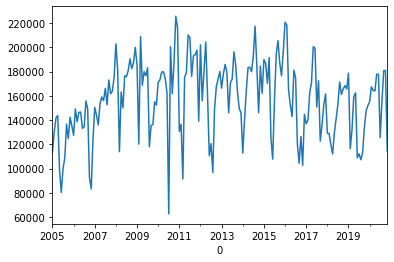

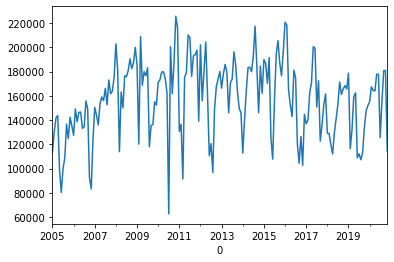

In [5]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

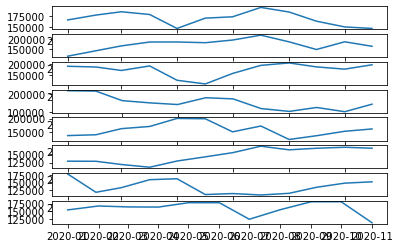

In [8]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
groups = series['2013':'2020'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
    pyplot.subplot((n_groups*100) + 10 + i)
    i += 1
    pyplot.plot(group)
pyplot.show()

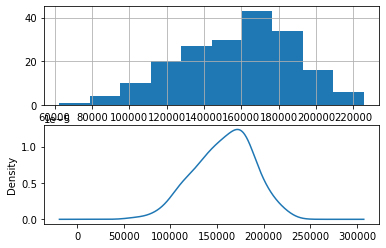

In [38]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

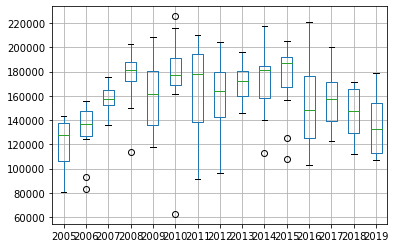

In [39]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
groups = series['2005':'2019'].groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

ADF Statistic: -3.073689
p-value: 0.028563
Critical Values:
	1%: -3.471
	5%: -2.879
	10%: -2.576


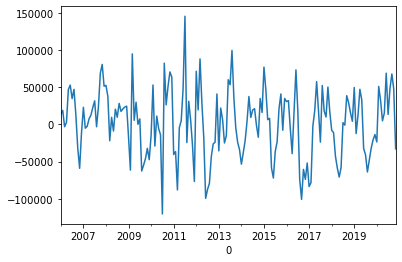

In [40]:

from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv', header=False)
# plot
stationary.plot()
pyplot.show()

In [41]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

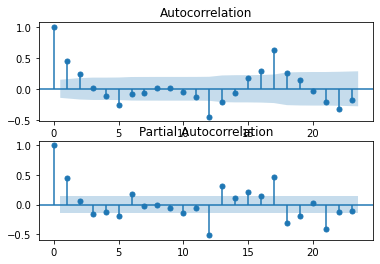

In [42]:

from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = read_csv('stationary.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

In [14]:
# evaluate manually configured ARIMA model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(1,0,1))
	model_fit = model.fit()
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=132978.942, Expected=179953.000
>Predicted=216587.581, Expected=166299.000
>Predicted=150316.003, Expected=177971.000
>Predicted=187671.227, Expected=185851.000
>Predicted=210274.057, Expected=179305.000
>Predicted=157411.016, Expected=145980.000
>Predicted=107910.068, Expected=170609.000
>Predicted=140068.251, Expected=173825.000
>Predicted=118499.625, Expected=196279.000
>Predicted=187548.793, Expected=185277.000
>Predicted=188412.645, Expected=163336.000
>Predicted=178982.196, Expected=149601.000
>Predicted=176827.844, Expected=145976.000
>Predicted=158538.358, Expected=112764.000
>Predicted=162558.001, Expected=139759.000
>Predicted=173810.575, Expected=164102.000
>Predicted=172942.677, Expected=183342.000
>Predicted=148981.351, Expected=183500.000
>Predicted=186118.543, Expected=179920.000
>Predicted=181669.692, Expected=193148.000
>Predicted=206501.065, Expected=217386.000
>Predicted=196493.374, Expected=184179.000
>Predicted=167330.869, Expected=146044.000
>Predicted=

In [15]:
# grid search ARIMA parameters for time series
import warnings
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		months_in_year = 12
		diff = difference(history, months_in_year)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		yhat = inverse_difference(history, yhat, months_in_year)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 8)
d_values = range(0, 5)
q_values = range(0, 8)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=42175.264
ARIMA(0, 0, 1) RMSE=37132.831
ARIMA(0, 0, 2) RMSE=35967.217
ARIMA(0, 0, 3) RMSE=36592.880
ARIMA(0, 0, 4) RMSE=36477.804
ARIMA(0, 0, 5) RMSE=38156.087
ARIMA(0, 0, 6) RMSE=36202.794
ARIMA(0, 0, 7) RMSE=36188.435
ARIMA(0, 1, 0) RMSE=38615.547
ARIMA(0, 1, 1) RMSE=40836.635
ARIMA(0, 1, 2) RMSE=37447.311
ARIMA(0, 1, 3) RMSE=36130.179
ARIMA(0, 1, 4) RMSE=36755.439
ARIMA(0, 1, 5) RMSE=36625.741
ARIMA(0, 1, 6) RMSE=38151.354
ARIMA(0, 1, 7) RMSE=36259.880
ARIMA(0, 2, 0) RMSE=57516.803
ARIMA(0, 2, 1) RMSE=38812.828
ARIMA(0, 2, 2) RMSE=39943.291
ARIMA(0, 2, 3) RMSE=38790.323
ARIMA(0, 2, 4) RMSE=37168.377
ARIMA(0, 2, 5) RMSE=38312.585
ARIMA(0, 2, 6) RMSE=38337.269
ARIMA(0, 2, 7) RMSE=39614.115
ARIMA(0, 3, 0) RMSE=99468.389
ARIMA(0, 3, 1) RMSE=57790.581
ARIMA(0, 3, 2) RMSE=40457.285
ARIMA(0, 3, 3) RMSE=40784.799
ARIMA(0, 3, 4) RMSE=41497.420
ARIMA(0, 3, 5) RMSE=42924.999
ARIMA(0, 3, 6) RMSE=44312.728
ARIMA(0, 3, 7) RMSE=44991.491
ARIMA(0, 4, 0) RMSE=181182.223
ARIMA(0, 

ARIMA(7, 0, 3) RMSE=36173.938
ARIMA(7, 0, 4) RMSE=35716.219
ARIMA(7, 0, 5) RMSE=33463.587
ARIMA(7, 0, 6) RMSE=35170.968
ARIMA(7, 0, 7) RMSE=33124.095
ARIMA(7, 1, 0) RMSE=41852.381
ARIMA(7, 1, 2) RMSE=38422.539
ARIMA(7, 1, 3) RMSE=37552.905
ARIMA(7, 1, 4) RMSE=36602.422
ARIMA(7, 1, 5) RMSE=36413.303
ARIMA(7, 1, 6) RMSE=36230.173
ARIMA(7, 1, 7) RMSE=35355.980
ARIMA(7, 2, 0) RMSE=47993.638
ARIMA(7, 2, 1) RMSE=41962.404
ARIMA(7, 2, 2) RMSE=41706.146
ARIMA(7, 2, 3) RMSE=38675.518
ARIMA(7, 2, 4) RMSE=37783.269
ARIMA(7, 2, 5) RMSE=36254.510
ARIMA(7, 2, 6) RMSE=37723.975
ARIMA(7, 2, 7) RMSE=35342.276
ARIMA(7, 3, 0) RMSE=55598.395
ARIMA(7, 3, 1) RMSE=48104.073
ARIMA(7, 3, 2) RMSE=43734.866
ARIMA(7, 3, 3) RMSE=41089.591
ARIMA(7, 3, 4) RMSE=38151.489
ARIMA(7, 3, 5) RMSE=44674.418
ARIMA(7, 3, 6) RMSE=39730.277
ARIMA(7, 3, 7) RMSE=38686.330
ARIMA(7, 4, 0) RMSE=66515.434
ARIMA(7, 4, 1) RMSE=55861.264
ARIMA(7, 4, 2) RMSE=50731.149
ARIMA(7, 4, 3) RMSE=49141.496
ARIMA(7, 4, 4) RMSE=976612743727701.375


                  0
count     96.000000
mean   -3739.520191
std    32102.570892
min   -99791.157022
25%   -21454.198182
50%    -4172.122576
75%    18836.132890
max    69438.190430


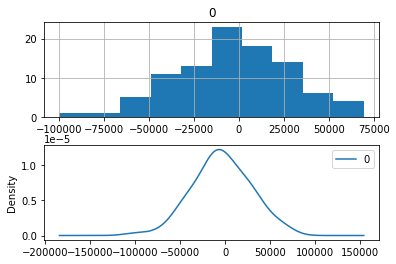

In [16]:
# summarize ARIMA forecast residuals
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(2,0,7))
	model_fit = model.fit()
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

RMSE: 32434.916
                   0
count      96.000000
mean     1167.933954
std     32584.033892
min   -112118.463360
25%    -19228.980380
50%       239.559561
75%     23931.092023
max    107302.627826


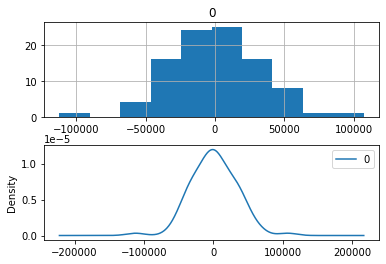

In [18]:
# plots of residual errors of bias corrected forecasts
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = -3739.520191
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(6,0,6))
	model_fit = model.fit()
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

                  0
count     96.000000
mean   -3739.520191
std    32102.570892
min   -99791.157022
25%   -21454.198182
50%    -4172.122576
75%    18836.132890
max    69438.190430


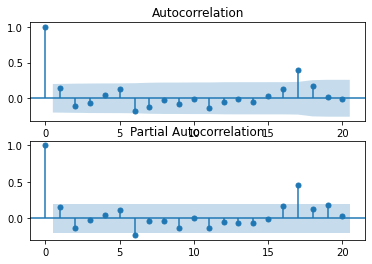

In [17]:
# ACF and PACF plots of residual errors of bias corrected forecasts
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(2,0,7))
	model_fit = model.fit()
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

In [19]:

# save finalized model
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(2,0,7))
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = -2406.392844
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

In [20]:
# load finalized model and make a prediction
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMAResults
import numpy
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
months_in_year = 12
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

Predicted: 154702.813


>Predicted=154702.813, Expected=155544.000
>Predicted=120942.408, Expected=145972.000
>Predicted=134403.781, Expected=148617.000
>Predicted=170441.816, Expected=158014.000
>Predicted=168378.119, Expected=151463.000
>Predicted=130517.013, Expected=171461.000
>Predicted=194221.993, Expected=191457.000
>Predicted=154956.381, Expected=201945.000
>Predicted=192900.608, Expected=187518.000
>Predicted=177356.060, Expected=185384.000
>Predicted=173061.062, Expected=172047.000
>Predicted=132445.965, Expected=211378.000
RMSE: 30938.751


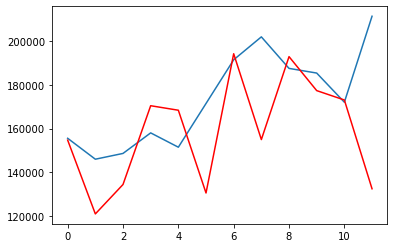

In [21]:
# load and evaluate the finalized model on the validation dataset
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load and prepare datasets
dataset = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = dataset.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(2,0,7))
	model_fit = model.fit()
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()